Welcome to the project Customer Attrition Analysis of Verizonet

In machine learning there are mainly 7 steps for the data preprocessing and they are;
 - Data Acquiring
 - Importing Libraries
 - Importing datasets
 - Finding Missing data
 - Ecoding Categorical Data
 - Splitting the dataset
 - Feature Scaling
 

# *DATA PREPROCESSING*

### DATA ACQUIRING OR IMPORTING THE DATA

For importing the data we have to import the necessary libraries needed for it first. All the required libraries are installed here before so I am not adding the installlation of specified library here.



In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn


In [200]:
df=pd.read_csv("verizonet_data.csv")
## code for importing the data in csv form
 

In [246]:
# for display some of the rows of the data
print(df.head())

     Offer Phone Service Multiple Lines Internet Service Internet Type  \
0  Offer B            No             No              Yes   Fiber Optic   
1  Offer E           Yes            Yes              Yes         Cable   
2  Offer D           Yes            Yes              Yes   Fiber Optic   
3  Offer C           Yes             No              Yes   Fiber Optic   
4  Offer C           Yes            Yes              Yes         Cable   

  Online Security Online Backup Device Protection Plan Premium Tech Support  \
0              No            No                    Yes                   No   
1              No           Yes                     No                   No   
2              No            No                     No                   No   
3              No           Yes                    Yes                   No   
4              No            No                     No                   No   

  Streaming TV  ... Tenure in Months Avg Monthly Long Distance Charges  \
0     

In [247]:
# for checking the datatypes and missing data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Offer                              7043 non-null   object 
 1   Phone Service                      7043 non-null   object 
 2   Multiple Lines                     7043 non-null   object 
 3   Internet Service                   7043 non-null   object 
 4   Internet Type                      7043 non-null   object 
 5   Online Security                    7043 non-null   object 
 6   Online Backup                      7043 non-null   object 
 7   Device Protection Plan             7043 non-null   object 
 8   Premium Tech Support               7043 non-null   object 
 9   Streaming TV                       7043 non-null   object 
 10  Streaming Movies                   7043 non-null   object 
 11  Streaming Music                    7043 non-null   objec

In [203]:
# to calculate the summary statistics
print(df.describe())

       Number of Referrals  Tenure in Months  \
count          7043.000000       7043.000000   
mean              1.951867         32.386767   
std               3.001199         24.542061   
min               0.000000          1.000000   
25%               0.000000          9.000000   
50%               0.000000         29.000000   
75%               3.000000         55.000000   
max              11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                21.110890   
std                            15.448113                20.948471   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                28.000000   
max            

In [204]:
# to find out the unique values in each column
print(df.nunique())

Customer ID                          7043
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                63
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Paperless Billing                       2
Payment Method                          3
Monthly Charge                       2295
Total Regular Charges             

In [205]:
# Checking for missing values
df.isnull().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

In [206]:
# Checking for multiple or duplicate values
df.duplicated().sum() # there is no duplicate values.

0

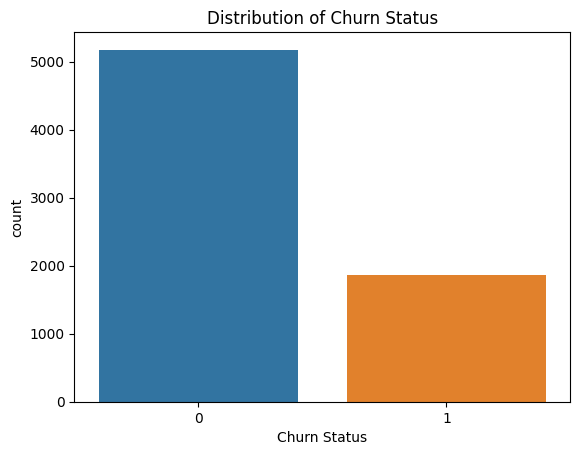

In [207]:
# Check the distribution of the target variable
sns.countplot(x='Churn Status', data=df)
plt.title('Distribution of Churn Status')
plt.show()

EXPLORATION OF THE NUMERICAL AND CATEGORICAL FEATURES

In [208]:
#NUMERICAL FEATURES
#Identify numerical features
numerical_features=df.select_dtypes(include=['int64','float64']).columns
print("NUMERICAL FEATURES: ",numerical_features)

NUMERICAL FEATURES:  Index(['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Regular Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges', 'Age',
       'Zip Code', 'Population', 'Churn Status', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate'],
      dtype='object')


In [209]:
#CATEGORICAL FEATURES
#Identify categorical features
categorical_features=df.select_dtypes(include=['object']).columns
print("CATEGORICAL FEATURES: ",categorical_features)

CATEGORICAL FEATURES:  Index(['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Gender', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'City', 'Churn Category', 'Churn Reason'],
      dtype='object')


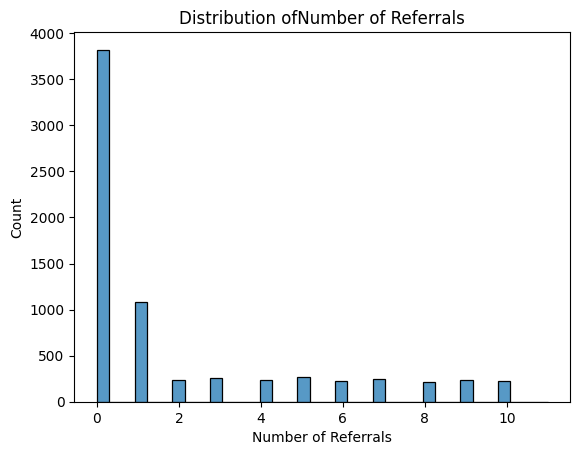

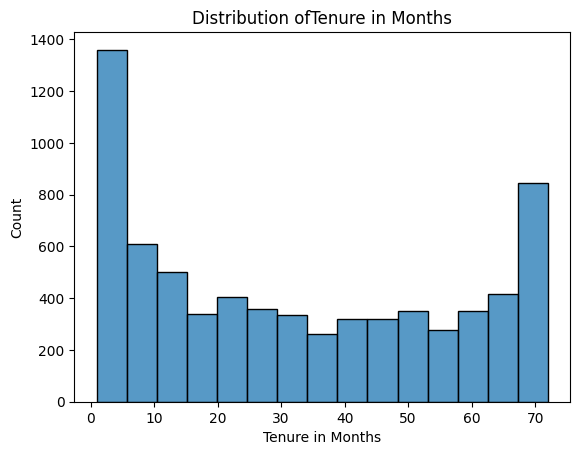

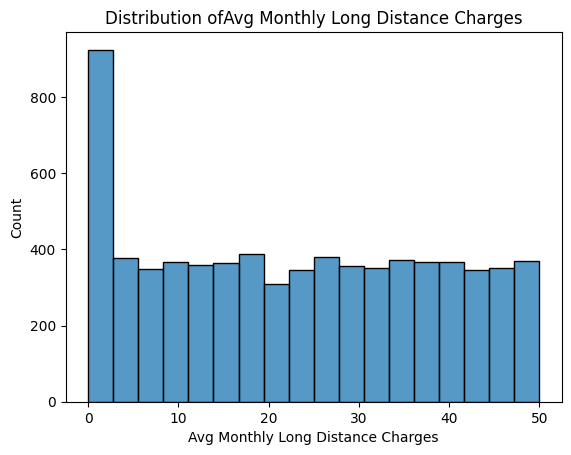

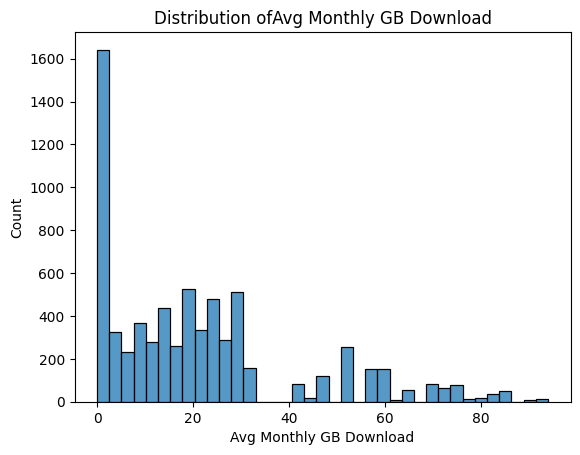

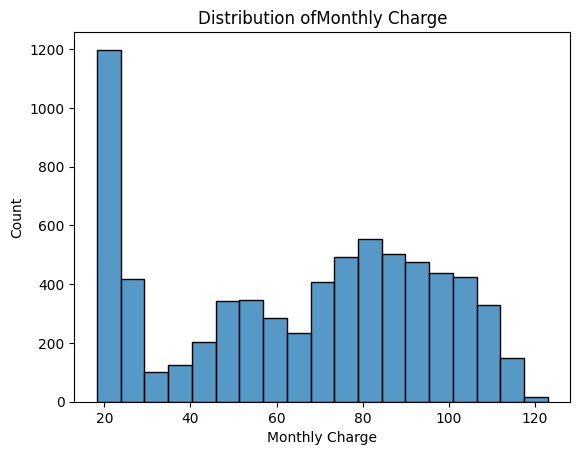

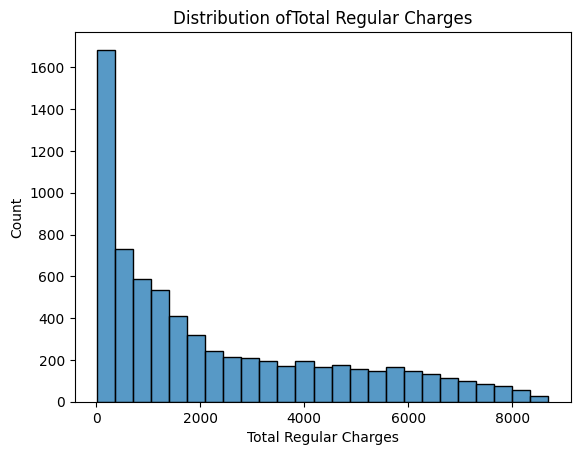

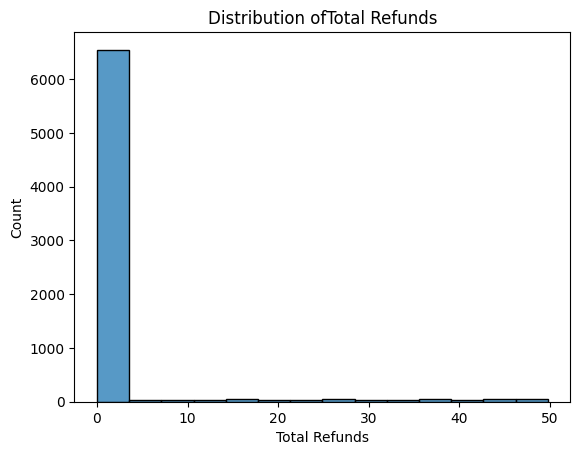

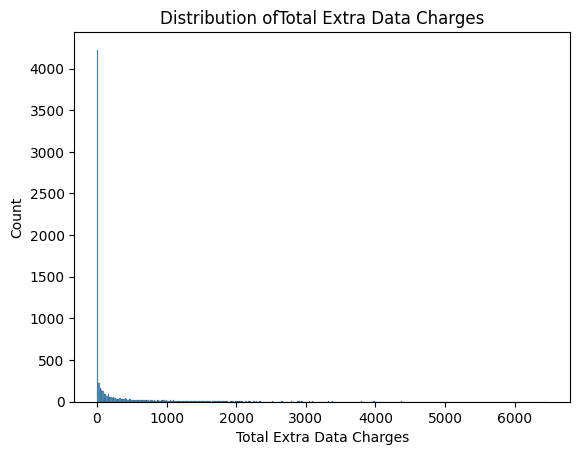

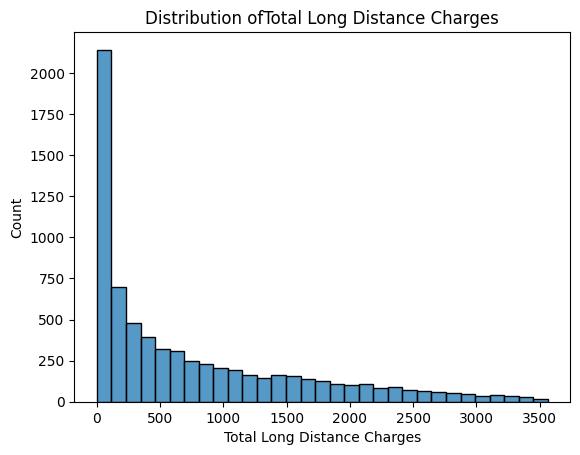

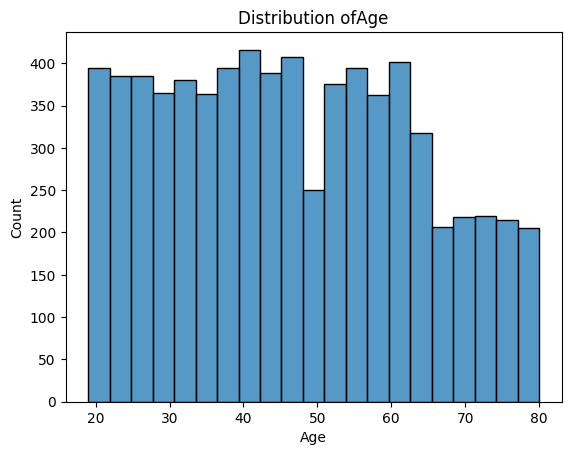

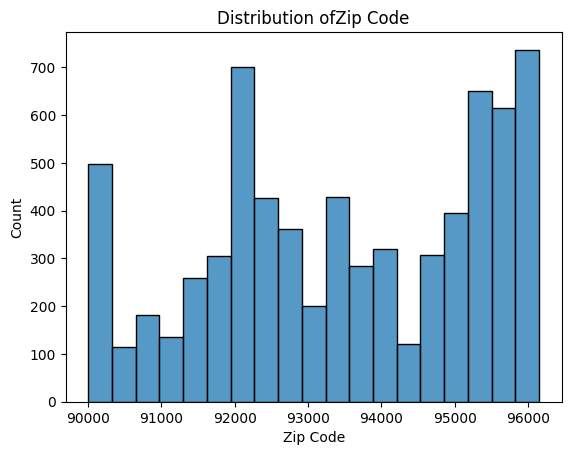

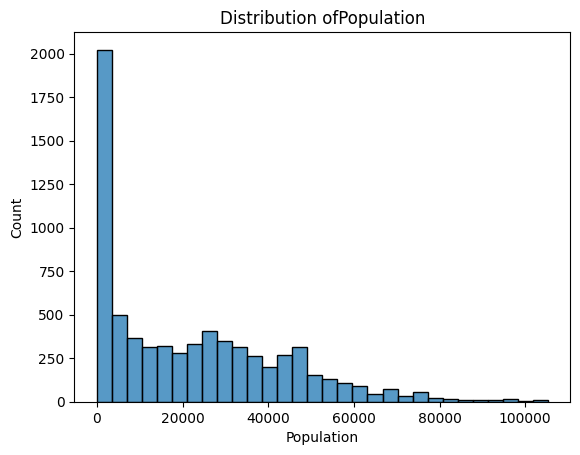

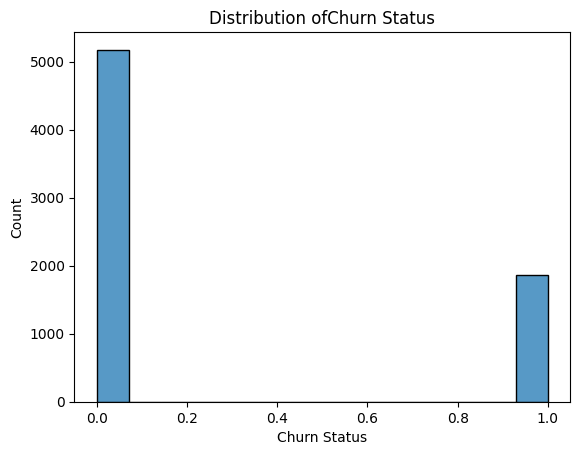

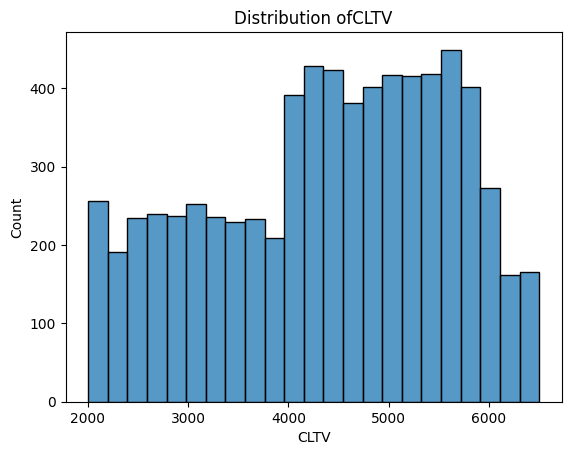

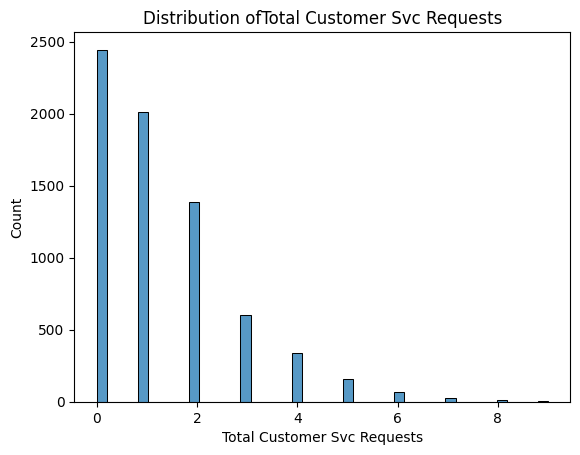

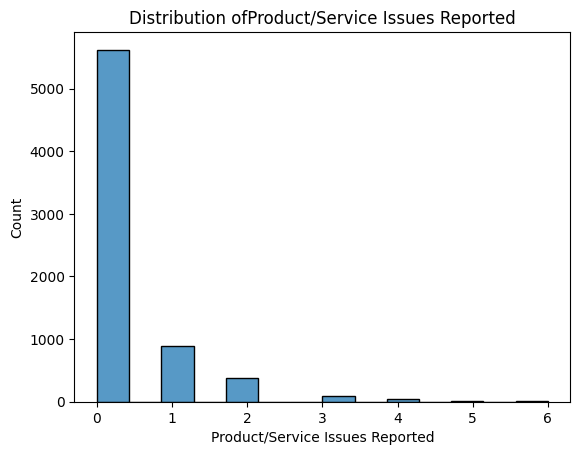

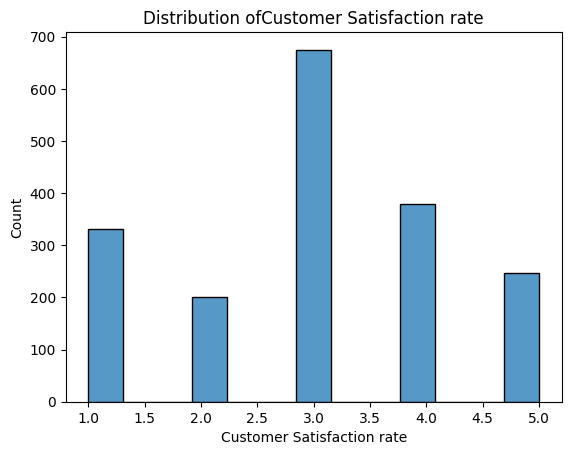

In [210]:
#Distribution of numerical features
num_features=['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Regular Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges', 'Age',
       'Zip Code', 'Population', 'Churn Status', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate']
for feature in num_features:
    sns.histplot(df[feature])
    plt.title(f'Distribution of{feature}')
    plt.show()

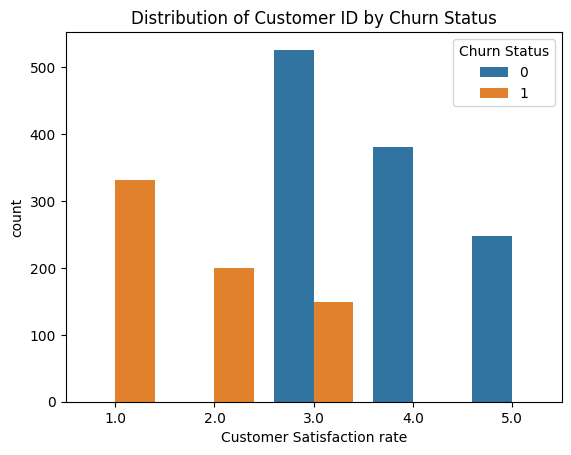

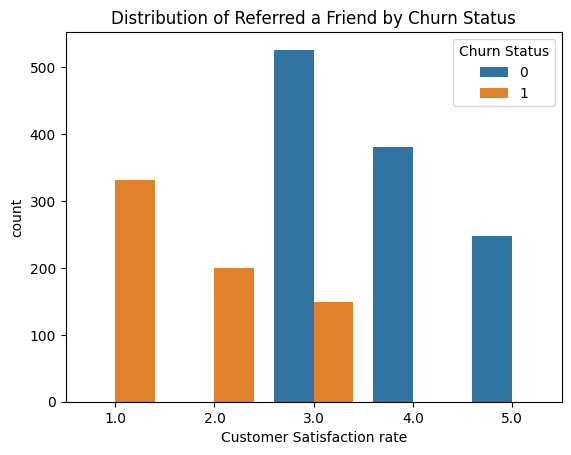

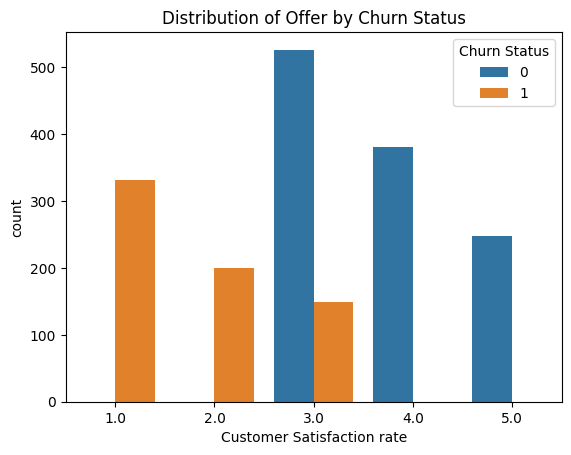

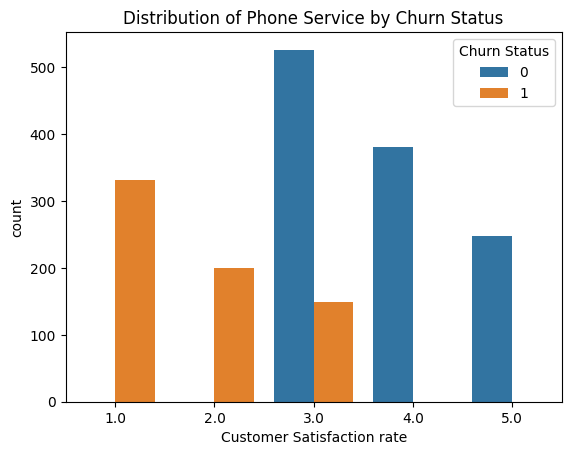

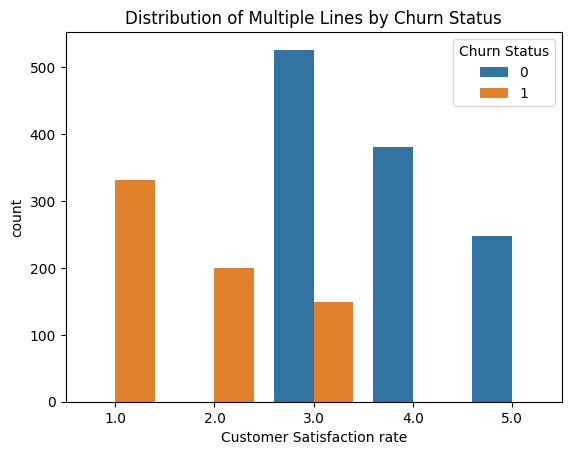

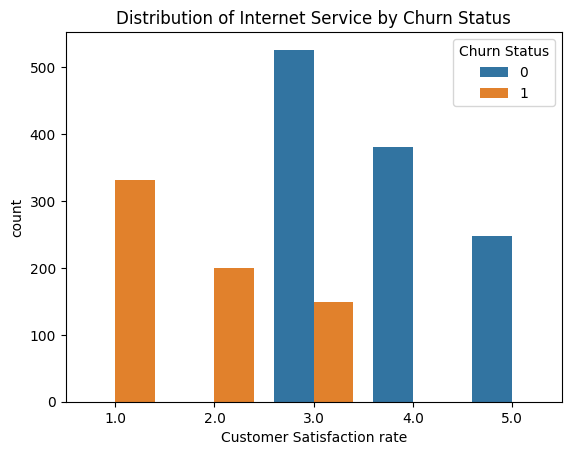

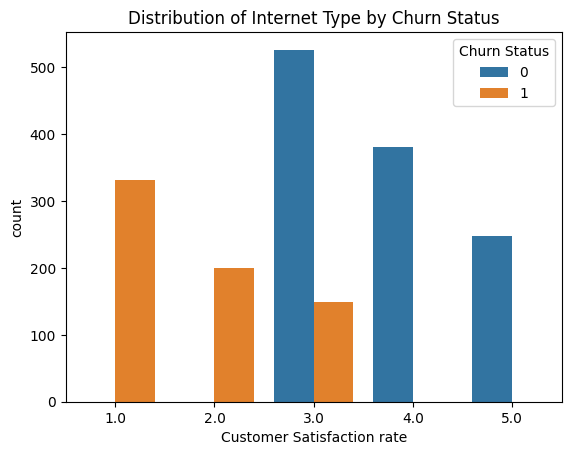

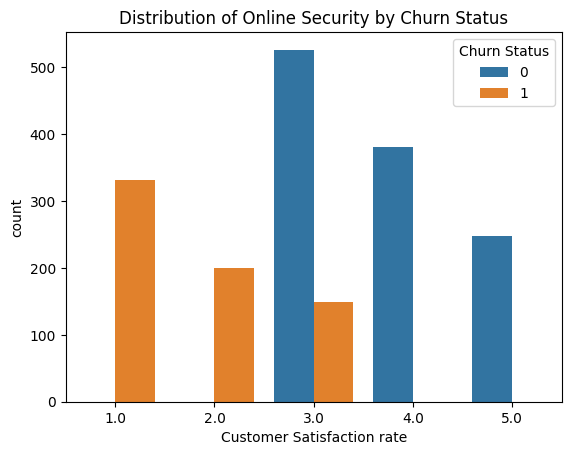

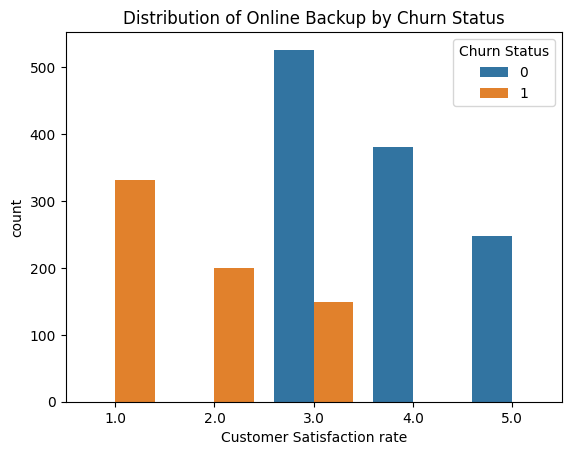

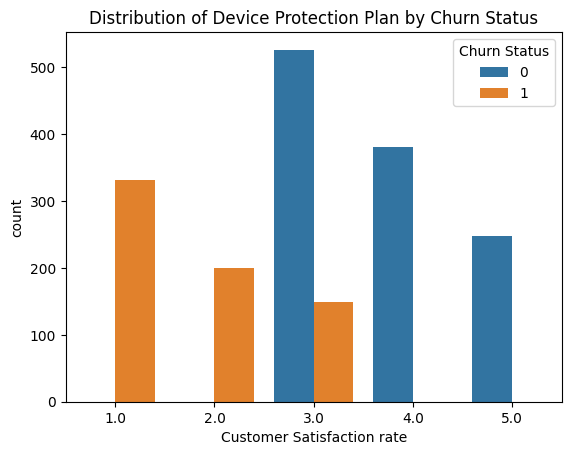

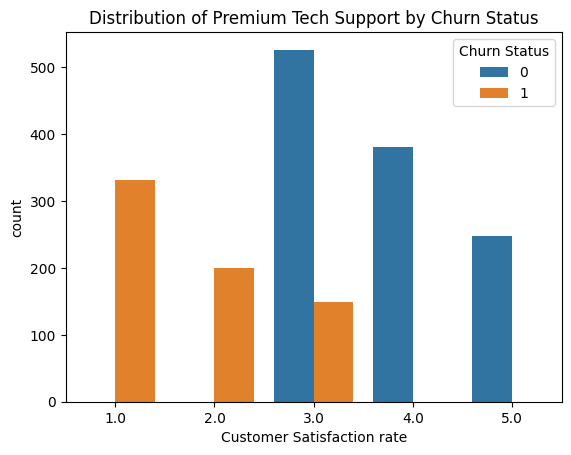

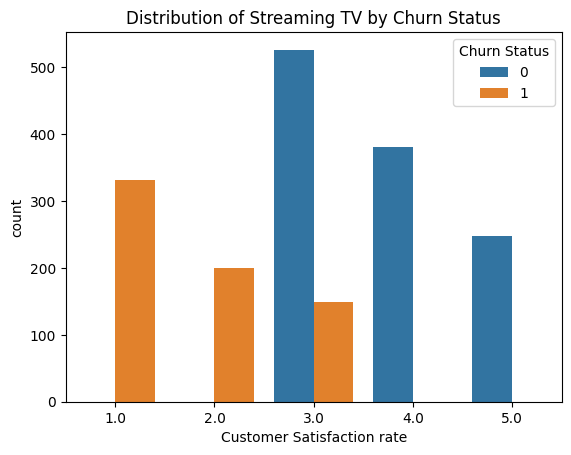

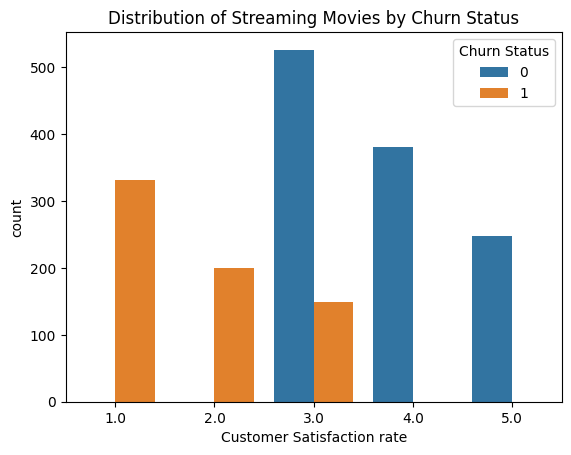

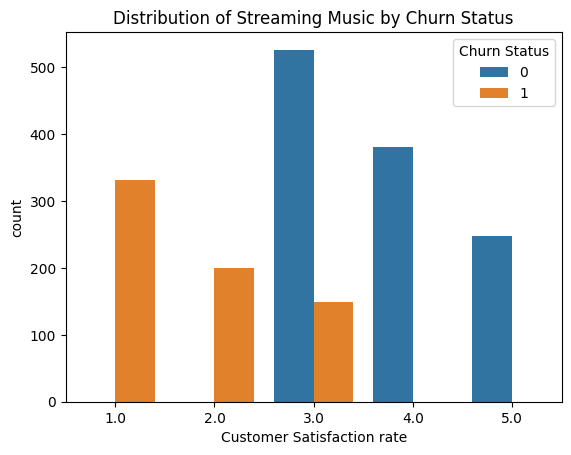

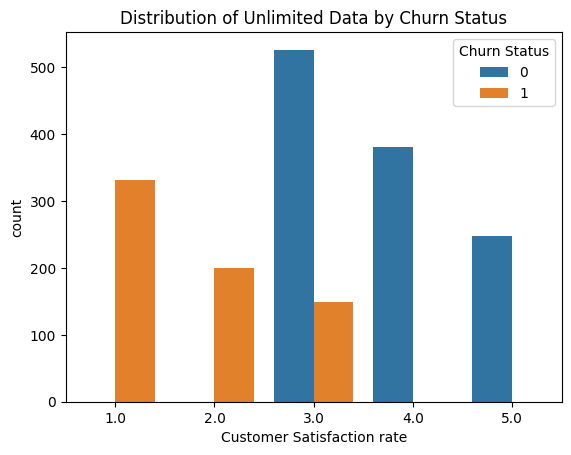

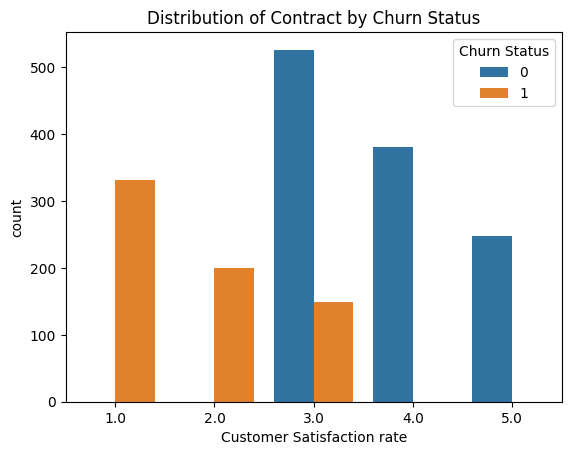

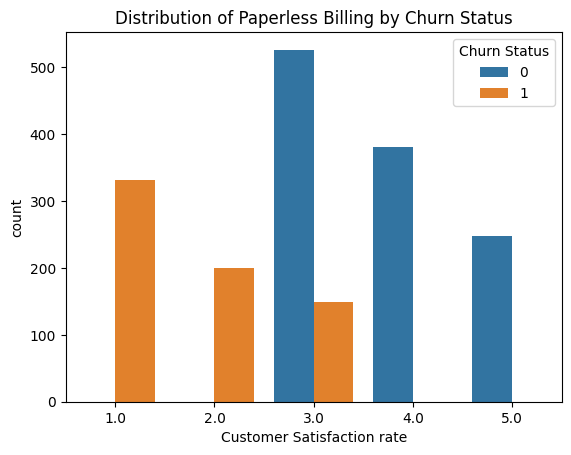

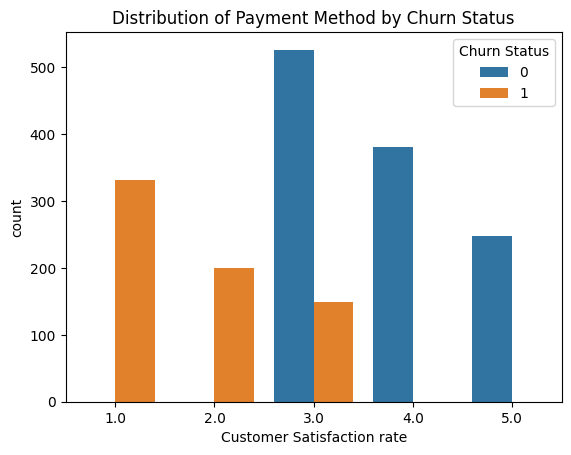

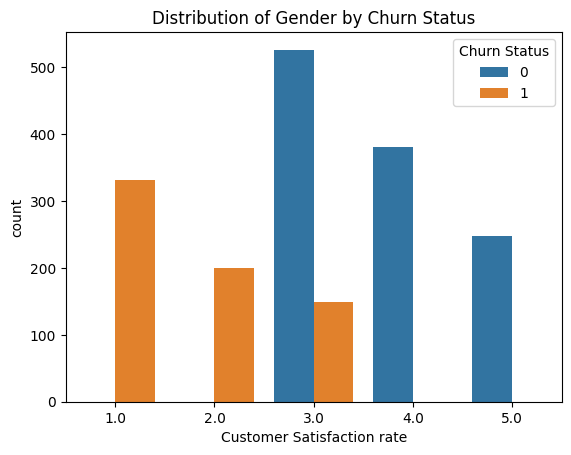

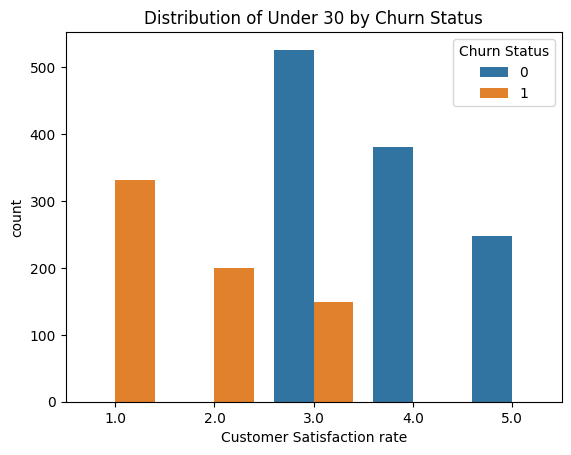

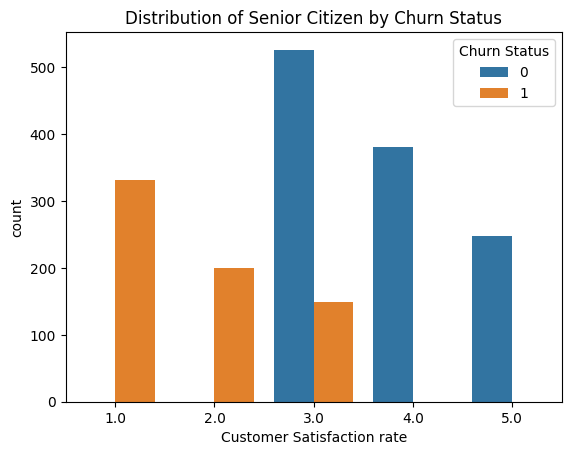

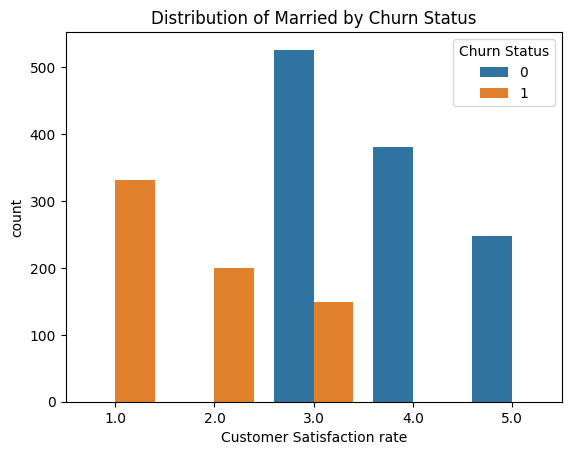

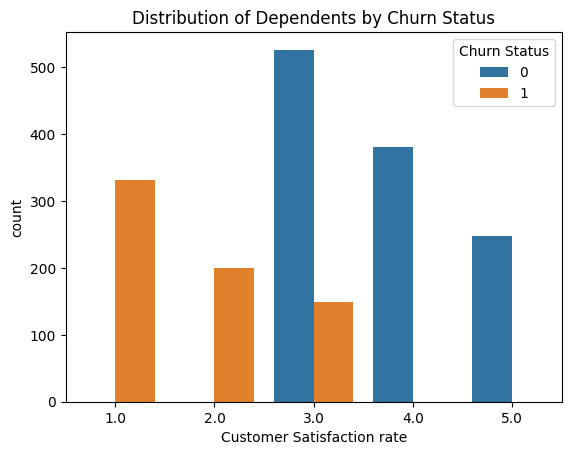

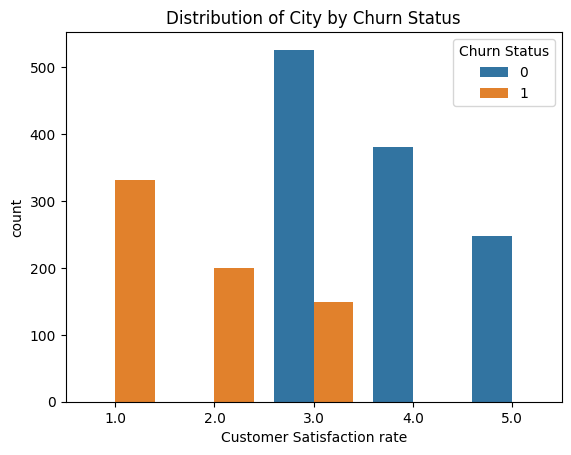

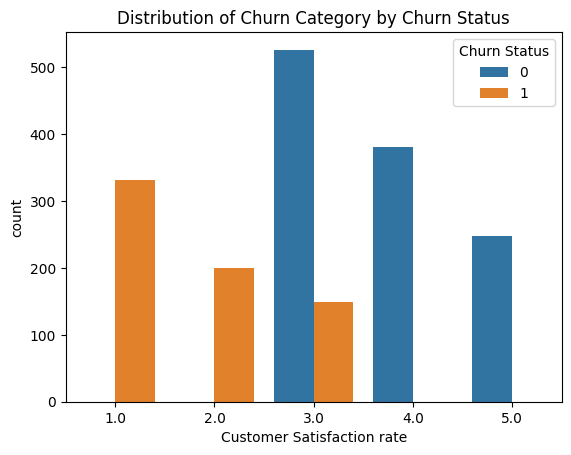

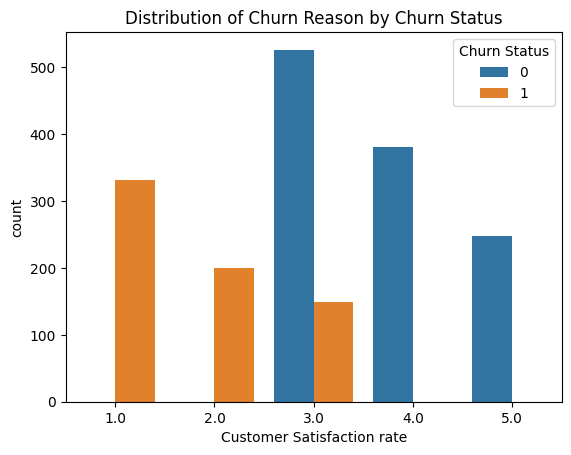

In [211]:
#Distribution of categorical features
cat_features=['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Gender', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'City', 'Churn Category', 'Churn Reason']
for features in cat_features:
    sns.countplot(x=feature, hue='Churn Status', data=df)
    plt.title(f'Distribution of {features} by Churn Status')
    plt.show()

In [212]:
# removing the columns which are not necessary
columns_needed=['Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Gender', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'City', 'Churn Category', 'Churn Reason',
        'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Age','Churn Status', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate']
#drop unneccessary columns
df=df[columns_needed]

In [213]:
df.info() # the above mentioned columns has been removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Offer                              3166 non-null   object 
 1   Phone Service                      7043 non-null   object 
 2   Multiple Lines                     7043 non-null   object 
 3   Internet Service                   7043 non-null   object 
 4   Internet Type                      5517 non-null   object 
 5   Online Security                    7043 non-null   object 
 6   Online Backup                      7043 non-null   object 
 7   Device Protection Plan             7043 non-null   object 
 8   Premium Tech Support               7043 non-null   object 
 9   Streaming TV                       7043 non-null   object 
 10  Streaming Movies                   7043 non-null   object 
 11  Streaming Music                    7043 non-null   objec

In [214]:
print(df)

        Offer Phone Service Multiple Lines Internet Service Internet Type  \
0         NaN            No             No              Yes   Fiber Optic   
1     Offer E           Yes            Yes              Yes         Cable   
2     Offer D           Yes            Yes              Yes   Fiber Optic   
3     Offer C           Yes             No              Yes   Fiber Optic   
4     Offer C           Yes            Yes              Yes         Cable   
...       ...           ...            ...              ...           ...   
7038      NaN           Yes             No               No           NaN   
7039  Offer C           Yes            Yes              Yes           DSL   
7040      NaN           Yes            Yes              Yes         Cable   
7041      NaN            No             No              Yes           DSL   
7042      NaN           Yes             No              Yes   Fiber Optic   

     Online Security Online Backup Device Protection Plan  \
0             

In [215]:
#NUMERICAL FEATURES
#Identify numerical features
numerical_features=df.select_dtypes(include=['int64','float64']).columns
print("NUMERICAL FEATURES: ",numerical_features)

NUMERICAL FEATURES:  Index(['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Age', 'Churn Status', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate'],
      dtype='object')


In [216]:
#CATEGORICAL FEATURES
#Identify categorical features
categorical_features=df.select_dtypes(include=['object']).columns
print("CATEGORICAL FEATURES: ",categorical_features)

CATEGORICAL FEATURES:  Index(['Offer', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Gender', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City', 'Churn Category',
       'Churn Reason'],
      dtype='object')


In [217]:
#Checking the missing values in numerical variable
numerical_features=['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Age', 'Churn Status', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate']
missing_num=df[numerical_features].isnull().sum()
print("Missing values in numerical features:\n",missing_num)

Missing values in numerical features:
 Number of Referrals                     0
Tenure in Months                        0
Avg Monthly Long Distance Charges       0
Avg Monthly GB Download                 0
Monthly Charge                          0
Age                                     0
Churn Status                            0
CLTV                                    0
Total Customer Svc Requests             0
Product/Service Issues Reported         0
Customer Satisfaction rate           5209
dtype: int64


In [218]:
#Checking the missing values in categorical variable
categorical_features=['Offer', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Gender', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City', 'Churn Category',
       'Churn Reason']
missing_cat=df[categorical_features].isnull().sum()
print("Missing values in categorical features:\n",missing_cat)

Missing values in categorical features:
 Offer                     3877
Phone Service                0
Multiple Lines               0
Internet Service             0
Internet Type             1526
Online Security              0
Online Backup                0
Device Protection Plan       0
Premium Tech Support         0
Streaming TV                 0
Streaming Movies             0
Streaming Music              0
Unlimited Data               0
Contract                     0
Paperless Billing            0
Payment Method               0
Gender                       0
Under 30                     0
Senior Citizen               0
Married                      0
Dependents                   0
City                         0
Churn Category            5174
Churn Reason              5174
dtype: int64


In [219]:
#For filling the null values in numerical variable with mean
numerical_features=['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Age', 'Churn Status', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate']
for feature in numerical_features:
    df[feature].fillna(df[feature].mean(),inplace=True)
    
#For filling the null values in ctegorical variable with mode
categorical_features=['Offer', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Gender', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City', 'Churn Category',
       'Churn Reason']
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0],inplace=True)
    
print(df.isnull().sum())

Offer                                0
Phone Service                        0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Gender                               0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
City                                 0
Churn Category                       0
Churn Reason                         0
Number of Referrals                  0
Tenure in Months         

### ENCODING CATEGORICAL VARIABLE

In [250]:
#Selecting the categorical columns for OneHotEncoding
categorical_features=['Offer', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Gender', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City', 'Churn Category',
       'Churn Reason']

#applying the OneHotEncoding
df_encoded=pd.get_dummies(df,columns=categorical_features)

#For displaying the forst few rows of the encoded dataframe
df_encoded


,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Age,Churn Status,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,...,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
0,0,1,0.00,9,41.236,78,1,5433,5,0,...,False,False,False,False,False,False,False,False,False,False
1,1,8,48.85,19,83.876,74,1,5302,5,0,...,False,False,False,False,False,False,False,False,False,False
2,0,18,11.33,57,99.268,71,1,3179,1,0,...,False,False,False,False,False,False,False,False,False,False
3,1,25,19.76,13,102.440,78,1,5337,1,1,...,False,True,False,False,False,False,False,False,False,False
4,1,37,6.33,15,79.560,80,1,2793,1,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,72,22.77,0,21.150,30,0,5306,0,0,...,False,False,False,False,False,False,False,False,False,False
7039,1,24,36.05,24,84.800,38,0,2140,2,0,...,False,False,False,False,False,False,False,False,False,False
7040,4,72,29.66,59,103.200,30,0,5560,2,0,...,False,False,False,False,False,False,False,False,False,False
7041,1,11,0.00,17,29.600,32,0,2793,0,0,...,False,False,False,False,False,False,False,False,False,False


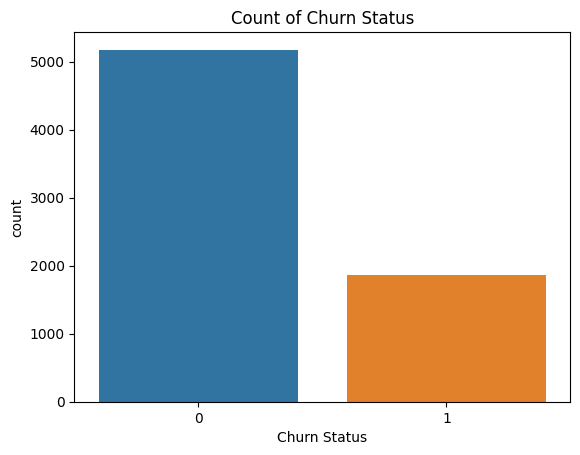

In [252]:
#for plotting the count of churn status
sns.countplot(x='Churn Status',data=df_encoded)
plt.title('Count of Churn Status')
plt.show()

##### SPLITTING THE DATA INTO TRAINING AND TESTING SET

In [221]:
print(df_encode.columns)

Index(['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Age', 'Churn Status', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       ...
       'Churn Reason_Lack of self-service on Website',
       'Churn Reason_Limited range of services',
       'Churn Reason_Long distance charges', 'Churn Reason_Moved',
       'Churn Reason_Network reliability',
       'Churn Reason_Poor expertise of online support',
       'Churn Reason_Poor expertise of phone support',
       'Churn Reason_Price too high', 'Churn Reason_Product dissatisfaction',
       'Churn Reason_Service dissatisfaction'],
      dtype='object', length=1191)


In [222]:
from sklearn.model_selection import train_test_split
#selecting the numerical features and encoded categorical features
numerical_features=['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Age', 'Churn Status', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate']

categorical_features=['Offer', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Gender', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City', 'Churn Category',
       'Churn Reason']

#selecting the target variable
target_variable='Churn Status'

#creating a dataframe with the selected features
selected_features=numerical_features+categorical_features+[target_variable]
df_selected=df[selected_features]

df_encode=pd.get_dummies(df_selected,columns=categorical_features)

#defining the features(X) and target (y)
features_X=df_encode.drop(target_variable,axis=1)
target_y=df_encode[target_variable]
 

#spltting the data into training and testing sets
X_train,X_test,y_train,y_test= train_test_split(features_X,target_y, test_size=0.2,random_state=42,stratify=target_y)

print('Training set shape-features:',X_train.shape,'Target:',y_train.shape)
print('Testing set shape-features:',X_test.shape,'Target:',y_test.shape)

Training set shape-features: (5634, 1189) Target: (5634, 2)
Testing set shape-features: (1409, 1189) Target: (1409, 2)


##### Feature Scaling

In [223]:
from sklearn.preprocessing import StandardScaler
#creating a standard scalar instance
scalar= StandardScaler()

#Fit the scalar on the training data and 
#transform both the training and testing data set
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


#Display the first few rows of the scaled training set
print("Scaled Training Set:")
print(pd.DataFrame(X_train_scaled,columns=X_train.columns).head())

Scaled Training Set:
   Number of Referrals  Tenure in Months  Avg Monthly Long Distance Charges  \
0            -0.652580         -0.670324                          -1.114694   
1            -0.652580         -0.832749                          -0.390338   
2            -0.652580         -1.279415                           1.699724   
3             2.004908          1.035130                           0.260091   
4             0.011792         -1.198203                          -0.246375   

   Avg Monthly GB Download  Monthly Charge       Age      CLTV  \
0                -0.818005       -0.338340 -0.211366 -0.529959   
1                -0.148909        1.293319  0.919362  1.269461   
2                -0.196701       -0.543929 -0.865998  0.745260   
3                 1.523832        0.089154 -1.342094  0.728459   
4                 0.042262        0.467699  0.145706 -0.115807   

   Total Customer Svc Requests  Product/Service Issues Reported  \
0                     0.461853          

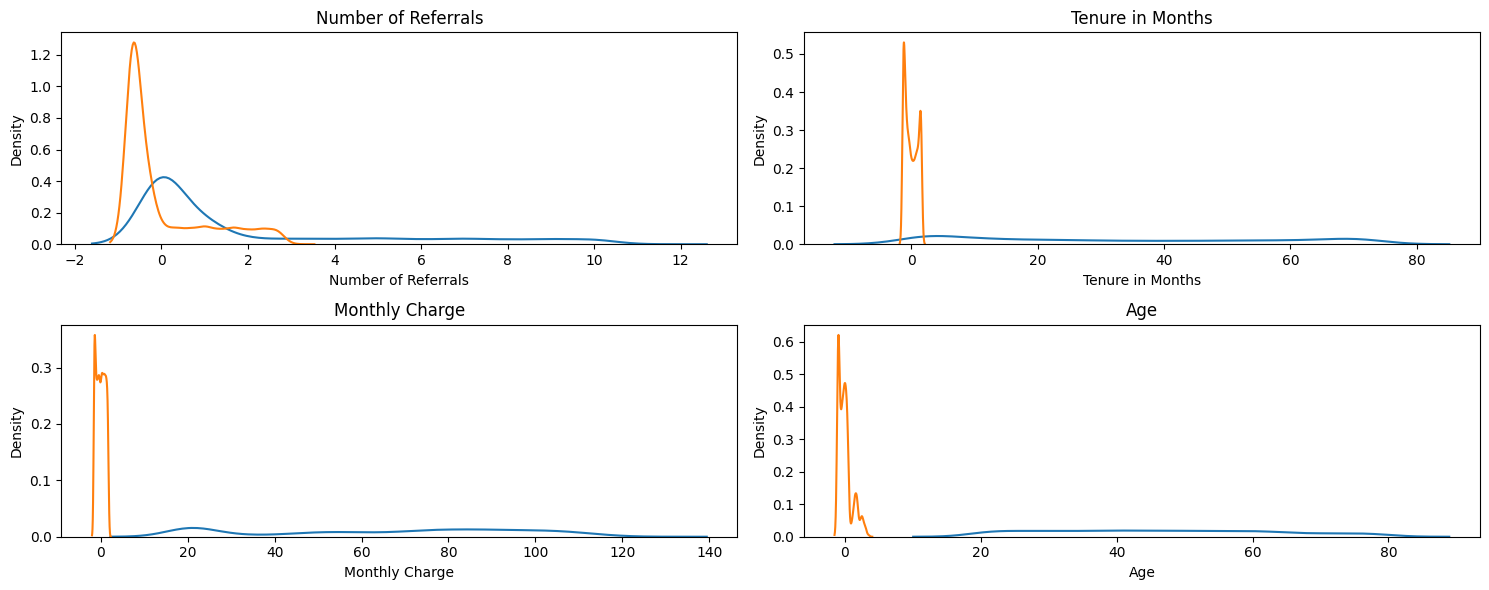

In [256]:
#plotting the results of the feature scaling
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot feature distributions
def plot_distributions(original_data, scaled_data, feature_names):
    plt.figure(figsize=(15, 6))
    
    for i, feature in enumerate(feature_names):
        plt.subplot(2, len(feature_names)//2, i+1)
        sns.kdeplot(original_data[feature], label='Original')
        sns.kdeplot(scaled_data[:, i], label='Scaled')
        plt.title(feature)
    
    plt.tight_layout()
    plt.show()

# Plotting distributions
numerical_features_to_plot = ['Number of Referrals', 'Tenure in Months', 'Monthly Charge', 'Age']
plot_distributions(X_train, X_train_scaled, numerical_features_to_plot)

##### MODEL BUILDING

In [259]:
from sklearn.multioutput import ClassifierChain
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming y_train and y_test are multi-label indicator matrices
# Create a Classifier Chain with a Decision Tree classifier
classifier_chain = ClassifierChain(base_estimator=DecisionTreeClassifier(random_state=42))

# Train the model on the scaled training data
classifier_chain.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_chain = classifier_chain.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy_chain = accuracy_score(y_test, y_pred_chain)
classification_report_chain = classification_report(y_test, y_pred_chain)

print(f'Classifier Chain Accuracy: {accuracy_chain}')
print('Classifier Chain Classification Report:\n', classification_report_chain)


Classifier Chain Accuracy: 0.9772888573456352
Classifier Chain Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       374
           1       0.95      0.97      0.96       374

   micro avg       0.95      0.97      0.96       748
   macro avg       0.95      0.97      0.96       748
weighted avg       0.95      0.97      0.96       748
 samples avg       0.26      0.26      0.26       748



C:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


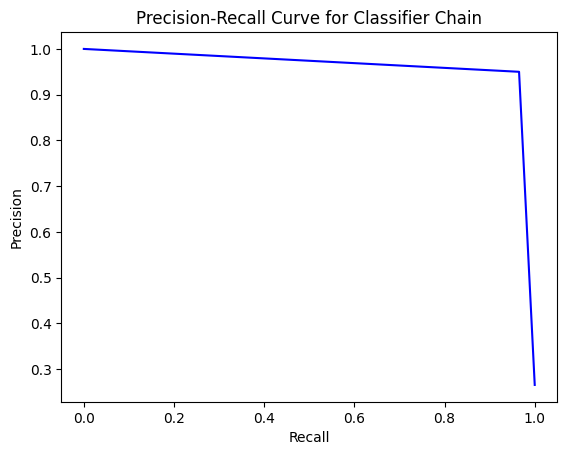

In [260]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_chain are multi-label indicator matrices
# Flatten the matrices to 1D arrays for precision-recall curve
y_test_flat = y_test.values.ravel()
y_pred_chain_flat = y_pred_chain.ravel()

# Calculate precision and recall for the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_flat, y_pred_chain_flat)

# Plot precision-recall curve
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Classifier Chain')
plt.show()

In [225]:
from sklearn.metrics import precision_score,recall_score,f1_score,hamming_loss
precision = precision_score(y_test,y_pred_chain,average='micro')
recall=recall_score(y_test,y_pred_chain,average='micro')
f1=f1_score(y_test,y_pred_chain,average='micro')
hamming=hamming_loss(y_test,y_pred_chain)
print(f'Precision:{precision}')
print(f'Recall:{recall}')
print(f'F1-Score:{f1}')
print(f'Hamming Loss:{hamming}')

Precision:0.95
Recall:0.9652406417112299
F1-Score:0.9575596816976127
Hamming Loss:0.0227111426543648


##### ERROR ANALYSIS

In [233]:
from sklearn.metrics import multilabel_confusion_matrix 

# Ensure y_test and y_pred_chain have the same number of samples
if len(y_test) != len(y_pred_chain):
    raise ValueError("Number of samples in y_test and y_pred_chain are inconsistent.")

# Calculating confusion_matrices for each class
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred_chain)

# Assuming that there are n classes
n = confusion_matrices.shape[0]

# Create DataFrames for each class
for i in range(n):
    class_name = f'Class_{i}'
    class_confusion_matrix = confusion_matrices[i]

    # Extracting TP, TN, FP, FN from the 3D array
    TN, FP = class_confusion_matrix[0]
    FN, TP = class_confusion_matrix[1]

    print(f"\nError Analysis for {class_name}:\n")
    print(f"TRUE POSITIVE: {TP}")
    print(f"TRUE NEGATIVE: {TN}")
    print(f"FALSE POSITIVE: {FP}")
    print(f"FALSE NEGATIVE: {FN}")


Error Analysis for Class_0:

TRUE POSITIVE: 361
TRUE NEGATIVE: 1016
FALSE POSITIVE: 19
FALSE NEGATIVE: 13

Error Analysis for Class_1:

TRUE POSITIVE: 361
TRUE NEGATIVE: 1016
FALSE POSITIVE: 19
FALSE NEGATIVE: 13


##### Reccommendations